<a href="https://colab.research.google.com/github/adas754/ann_class/blob/main/3_ANN_Implementation_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
tf.keras.__version__

Simple Classifier uisng Sequential Keras API

In [ ]:
# Mine
tf.config.list_physical_devices("GPU")

## To create NN which can classify whether the given data belongs to which number.A number can range from 0 to 9.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import keras

Loading the MNIST inbuilt dataset

In [ ]:
data=keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=data.load_data()

In [ ]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         54, 227, 253, 252, 239, 233, 252,  57,   6,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  60,
        224, 252, 253, 252, 202,  84, 252, 253, 122,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 252,
        252, 252, 253, 252, 252,  96, 189, 253, 167,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 238, 253,
        253, 190, 114, 253, 228,  47,  79, 255, 168,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252,
        179,  12,  75, 121,  21,   0,   0, 253, 243,  50,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38, 165, 253, 233, 208,
         84,   0,   0,   0,   0,   0,   0, 253, 252, 165,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7, 178, 252, 240,  71,  19,
         28,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  57, 252, 252,  63,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 195,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 198, 253, 190,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 255, 253, 196,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  76, 246, 252, 112,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 253, 252, 148,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 230,  25,   0,   0,   0,
          0,   0,   0,   0,   0,   7, 135, 253, 186,  12,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 223,   0,   0,   0,   0,
          0,   0,   0,   0,   7, 131, 252, 225,  71,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 145,   0,   0,   0,   0,
          0,   0,   0,  48, 165, 252, 173,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  86, 253, 225,   0,   0,   0,   0,
          0,   0, 114, 238, 253, 162,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 249, 146,  48,  29,  85,
        178, 225, 253, 223, 167,  56,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  85, 252, 252, 252, 229, 215, 252,
        252, 252, 196, 130,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  28, 199, 252, 252, 253, 252, 252,
        233, 145,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  25, 128, 252, 253, 252, 141,
         37,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[5655].shape

(28, 28)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[2].shape

(28, 28)

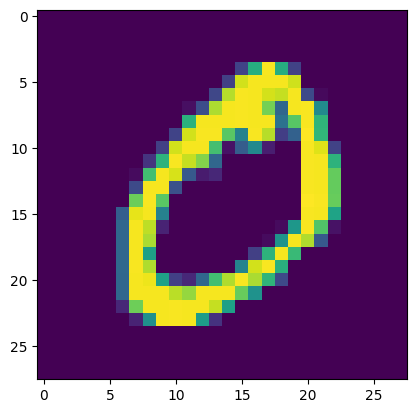

In [ ]:
plt.imshow(X_train[1])

In [ ]:
X_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

<Axes: >

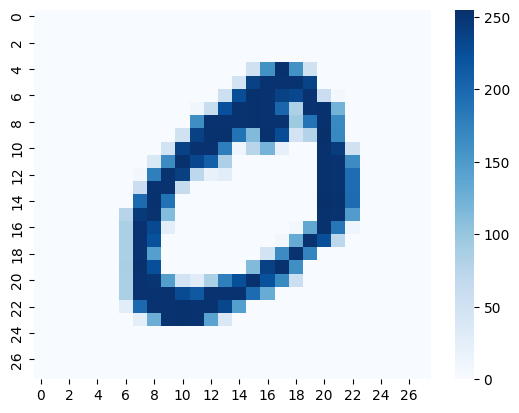

In [ ]:
import seaborn as sns
sns.heatmap(X_train[1], cmap='Blues')

In [ ]:
y_train[2]

4

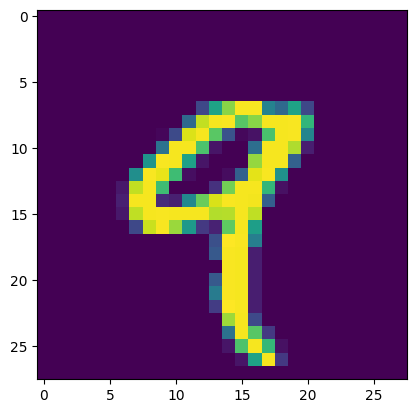

In [ ]:
plt.imshow(X_train[4])

In [ ]:
y_train[4]

9

In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
X_train[0]

In [ ]:
X_train[0].shape

In [ ]:
X_train.dtype,y_train.dtype

Validation data creation

In [ ]:
len(X_train)

60000

In [ ]:
x_valid,x_train=X_train[:5000]/255,X_train[5000:]/255
y_valid,y_train=y_train[:5000],y_train[5000:]

In [ ]:
len(x_train)

55000

In [ ]:
len(y_train)

55000

In [ ]:
x_valid.shape,y_valid.shape

((5000, 28, 28), (5000,))

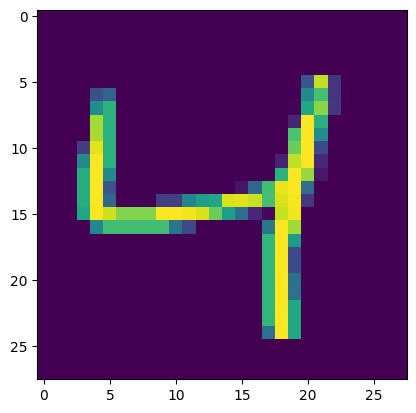

In [ ]:
plt.imshow(x_valid[2])

In [ ]:
x_valid[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Visualize the data

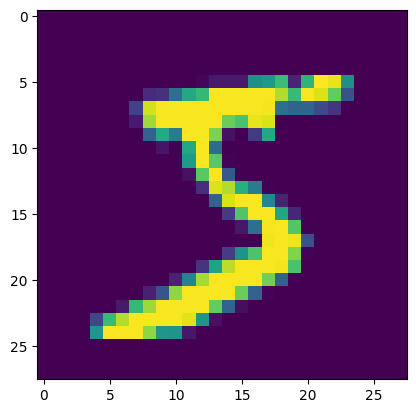

In [ ]:
plt.imshow(x_valid[0])

In [ ]:
plt.imshow(x_valid[1], cmap="binary")
# plt.axis("off")
plt.show()
# y_valid[1]

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], annot=True, cmap="binary")

Building Model Architecture

In [ ]:
len(np.unique(y_train))

In [ ]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="InputLayer"),
          tf.keras.layers.Dense(500, activation="relu", name="HiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),

]

In [ ]:
model = tf.keras.models.Sequential(LAYERS)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               50100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 443610 (1.69 MB)
Trainable params: 443610 (1.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
weights,bias = model.layers[1].get_weights()

<Axes: ylabel='Density'>

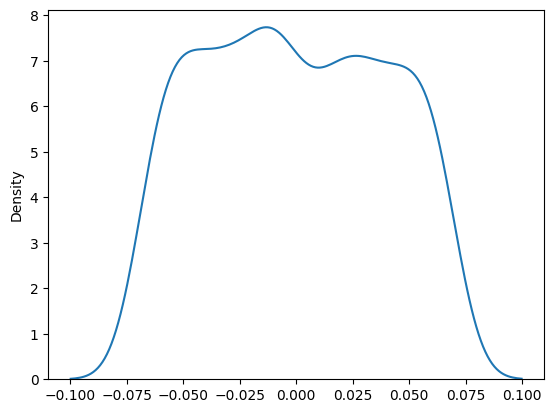

In [ ]:
import seaborn as sns
sns.kdeplot(weights[:,1])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               50100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 443610 (1.69 MB)
Trainable params: 443610 (1.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

In [ ]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

In [ ]:
hidden1 = model.layers[1] ## it will call hidden layer 1

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

In [ ]:
biases

In [ ]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer.
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

* **batch_size**: Integer or None.
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32.
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None.

    Number of samples per validation batch.
    
    If unspecified, will default to batch_size.
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [ ]:
 ## Training the model
EPOCHS = 10
VALIDATION_SET = (x_valid, y_valid)

history = model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/10
1719/1719 [==============================] - 11s 3ms/step - loss: 0.2022 - accuracy: 0.9390 - val_loss: 0.0981 - val_accuracy: 0.9698
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0824 - accuracy: 0.9744 - val_loss: 0.0776 - val_accuracy: 0.9764
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9819 - val_loss: 0.0726 - val_accuracy: 0.9788
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0427 - accuracy: 0.9862 - val_loss: 0.0786 - val_accuracy: 0.9762
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0836 - val_accuracy: 0.9788
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0664 - val_accuracy: 0.9818
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.0871 - val_accuracy

In [ ]:
model.evaluate(X_test, y_test) ## evaluating model on testing data

313/313 [==============================] - 1s 2ms/step - loss: 23.2201 - accuracy: 0.9777


[23.220050811767578, 0.9776999950408936]

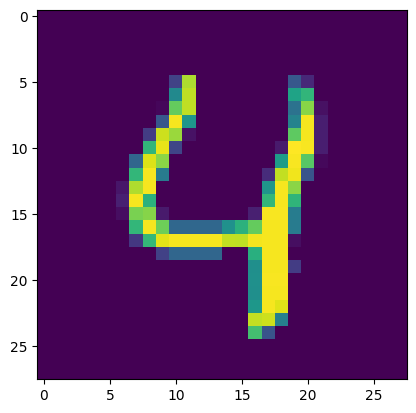

In [ ]:
plt.imshow(X_test[4])

In [ ]:
y_test[4]

4

In [ ]:
np.argmax(model.predict(X_test[4].reshape(1,28,28)))

1/1 [==============================] - 0s 20ms/step


4

In [ ]:
model.save("model.h5")  ## Saving the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model("/content/model.h5") ## Loading the saved model

In [ ]:
history.history

In [ ]:
history.history['val_accuracy']

In [ ]:
history.history['accuracy']

In [ ]:
model.get_weights()

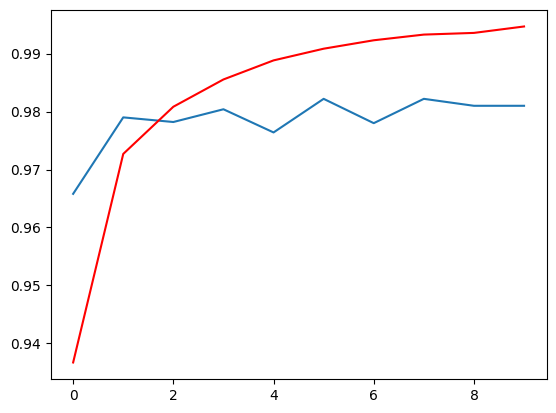

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'],color = 'red')

In [ ]:
## Creating metrix for performance during training
import pandas as pd
pd.DataFrame(history.history)

In [ ]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba


In [ ]:
import numpy as np
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.(dimshowata, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

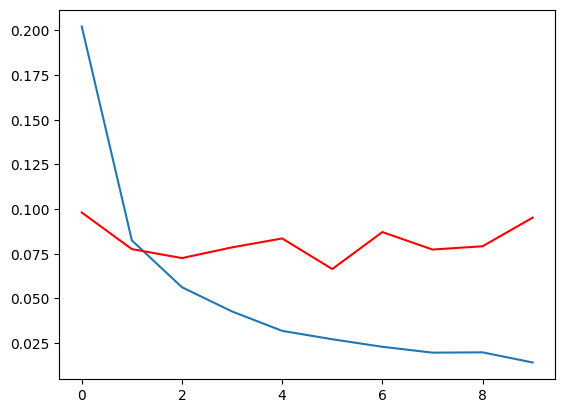

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss,color='red')